In [11]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from simg.model_utils import pipeline
from simg.data import get_connectivity_info
from data.utils import convert_NBO_graph_to_downstream

In [12]:
def convert2graph(file_path):
    with open(file_path, 'r') as file:
        file_content = file.read()
    xyz_data = [l + '\n' for l in file_content.split('\n')[2:-1]]
    symbols = [l.split()[0] for l in xyz_data]
    coordinates = np.array([[float(num) for num in l.strip().split()[1:]] for l in xyz_data])
    connectivity = get_connectivity_info(xyz_data)
    graph, _, _, _ = pipeline(symbols, coordinates, connectivity)
    graph.smiles = ""
    graph = convert_NBO_graph_to_downstream(graph, molecular_only=False)

    return graph

In [17]:
def get_node_features(file_path):
    graph = convert2graph(file_path)
    return graph.x

In [18]:
def visualize_tensor(tensor):
    plt.figure(figsize=(100,100))
    plt.imshow(np.array(tensor))

### Single conformer: Visualize node features

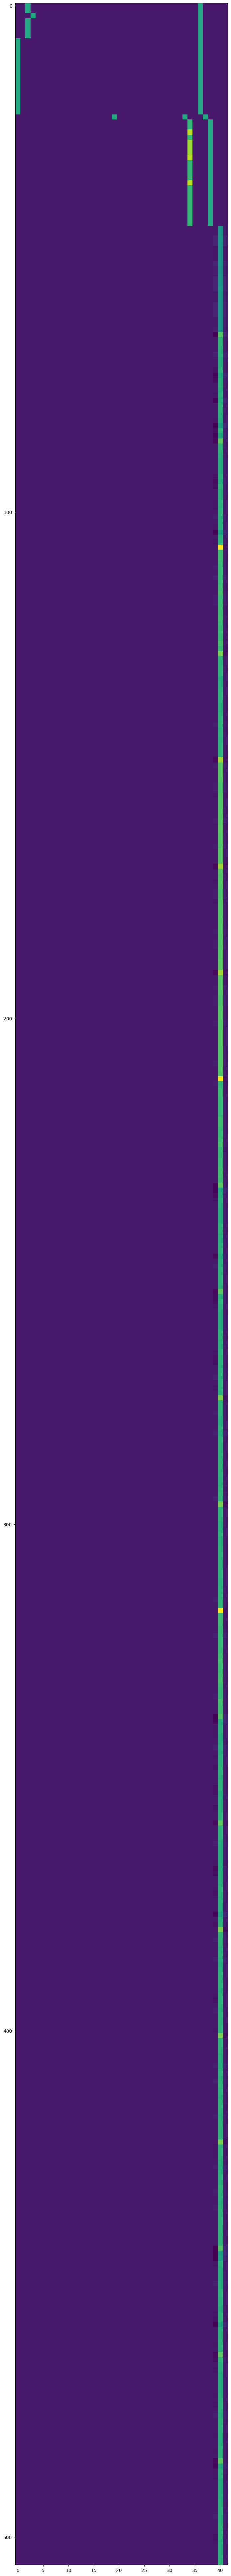

In [19]:
file_path = "example.xyz"
node_features = get_node_features(file_path)
visualize_tensor(node_features)

### Multiple conformers: Visualize deviation

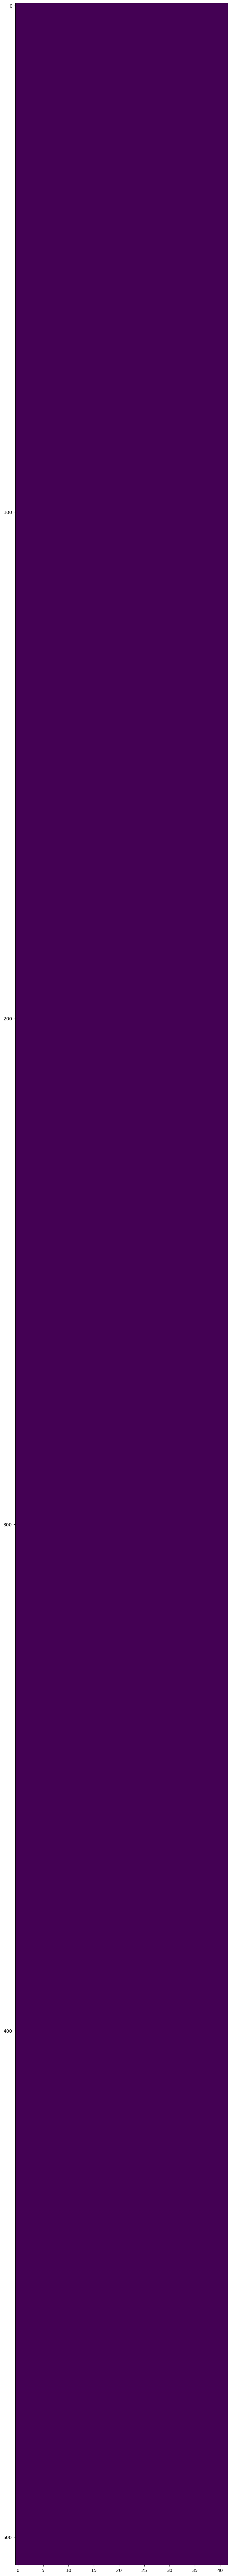

In [24]:
file_paths = ["example.xyz", "example.xyz", "example.xyz"] # insert multiple conformer xyzs
node_features = torch.tensor([get_node_features(file_path) for file_path in file_paths])
deviations = node_features.std(dim=0)
visualize_tensor(deviations)